In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
from keras.utils import get_file
import os

data_url = 'https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/3364/31151/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1680078705&Signature=W4uo0K38pAShcXVllaMJcvCTjL%2BMGznXp3Mvd1SsWk9NfJbxv8%2F49T4%2BgmOkLys3dpsQnCOTJC6FjNrFkqleflwAe3560IRjLqeF08ecWvA4ueKsXSK9INF8As%2FUefs8HQgSwJK2X43Aeidr2UXn8meE%2B%2FoTwV1rsu%2BstXdYZjvSxAMhIqwWaENLXy63wYWYJ6%2B4EvKQstBWbNbx56EvNXYeCXj9WyzOAjrcRSLVuhDMY1KkrOp4v%2BYhboPOkzVNGxTX7Sb%2Bc5tHgxc1ogrkzY%2BWBXu7JqYOga%2FtYtjmmVlcvHyOnOZun4My%2BwJgrxcubVtmMEBBzT0suvYCDIiW5w%3D%3D&response-content-disposition=attachment%3B+filename%3Dchallenges-in-representation-learning-facial-expression-recognition-challenge.zip'

zip_file = get_file(fname = 'challenges-in-representation-learning-facial-expression-recognition-challenge.zip', origin = data_url, extract = True)

base_dir, extension = os.path.splitext(zip_file)

train = pd.read_csv('/root/.keras/datasets/train.csv')

train['pixels'] = [np.fromstring(x, dtype = int, sep = ' ').reshape(-1, 48, 48, 1) for x in train['pixels']]
pixels = np.concatenate(train['pixels'])
labels = train.emotion.values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(pixels, labels, test_size=0.2, random_state = 101)

X_train_new = np.repeat(X_train, repeats = 3, axis = 3)
X_test_new = np.repeat(X_test, repeats = 3, axis = 3)

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(shear_range = 0.2, 
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   zoom_range = 0.2, 
                                   horizontal_flip = True, 
                                   rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

train_iter = train_datagen.flow(X_train_new, y_train)

test_iter = test_datagen.flow(X_test_new, y_test)

train_iter.reset()

batchX, batchy = train_iter.next()

Xmin = batchX.min()
Xmax = batchX.max()

ymin = batchy.min()
ymax = batchy.max()

299063632/299063632 [==============================] - 1s 0us/step


In [ ]:
img_width, img_height = 48, 48
input_shape = (img_width, img_height, 1)

num_class = 7
batch_size = 32
epochs = 100

train_num = 28709
test_num = 7178

train_steps = train_num // batch_size
test_steps = test_num // batch_size

In [ ]:
base_model = tf.keras.applications.ResNet50(
    input_shape = (48, 48, 3), 
    include_top = False)

base_model.trainable = False

base_model.summary()

In [ ]:
model = keras.Sequential(name = 'Final_Project_2')
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(7, activation='softmax'))

model.summary()

Model: "Final_Project_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 7)             

In [ ]:
from keras.optimizers import Adam

opt = tf.keras.optimizers.Adam()

model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train_new, y_train,
           epochs = 100,
           verbose = 1,
           shuffle = True,
           validation_data = (X_test_new, y_test))

Epoch 1/100
718/718 [==============================] - 33s 26ms/step - loss: 1.9889 - accuracy: 0.2683 - val_loss: 1.7328 - val_accuracy: 0.2914
Epoch 2/100
718/718 [==============================] - 19s 26ms/step - loss: 1.7560 - accuracy: 0.2843 - val_loss: 1.6805 - val_accuracy: 0.3257
Epoch 3/100
718/718 [==============================] - 17s 23ms/step - loss: 1.7150 - accuracy: 0.2951 - val_loss: 1.6665 - val_accuracy: 0.3274
Epoch 4/100
718/718 [==============================] - 16s 23ms/step - loss: 1.6981 - accuracy: 0.2993 - val_loss: 1.6408 - val_accuracy: 0.3185
Epoch 5/100
718/718 [==============================] - 16s 23ms/step - loss: 1.6848 - accuracy: 0.3043 - val_loss: 1.6316 - val_accuracy: 0.3231
Epoch 6/100
718/718 [==============================] - 17s 23ms/step - loss: 1.6776 - accuracy: 0.3036 - val_loss: 1.6253 - val_accuracy: 0.3730
Epoch 7/100
718/718 [==============================] - 19s 26ms/step - loss: 1.6600 - accuracy: 0.3145 - val_loss: 1.6192 - val_ac

In [ ]:
score = model.evaluate(test_iter)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_train_new).argmax(axis = 1)
y_train = np.argmax(y_train, axis = 1)

confusion_matrix(y_train, y_pred)

180/180 [==============================] - 4s 19ms/step - loss: 1.8526 - accuracy: 0.1825
Test loss: 1.852625846862793
Test accuracy: 0.18251480162143707
718/718 [==============================] - 11s 15ms/step


array([[1168,    0,  794,   99,    9,    0, 1157],
       [  65,    0,  173,   12,    5,    0,  109],
       [ 125,    0, 2031,  118,  249,   71,  641],
       [   0,    0,  160, 4265,    2,    0, 1332],
       [ 137,    0,  991,   95, 1475,    0, 1141],
       [   0,    0,  454,   70,    0, 1666,  382],
       [   0,    0,  360,  178,    5,    0, 3428]])

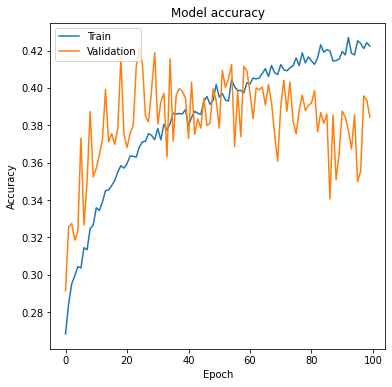

In [ ]:
plt.figure(figsize=(6, 6))
plt.title('Model accuracy')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
tf.keras.models.save_model(model, 'my_model2.hdf5')